In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('titanic.csv')

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


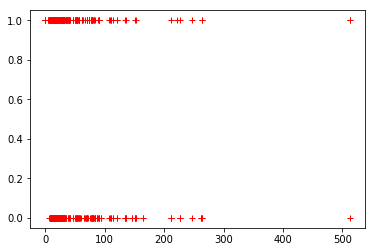

In [31]:
plt.plot(data['Fare'].values, data['Sex'].values, 'r+')

In [61]:
del data['PassengerId']
del data['Name']
del data['Ticket']
del data['Cabin']

In [40]:
convert_sex = {
    'male': 1,
    'female': 0
}

In [41]:
data['Sex'] = np.array([convert_sex[s] for s in data['Sex'].values])

In [42]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [36]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
s_vector = np.zeros(data.shape[0])
for ind in np.where(data['Embarked'] == 'S')[0]:
    s_vector[ind] = 1

data['S'] = s_vector

c_vector = np.zeros(data.shape[0])
for ind in np.where(data['Embarked'] == 'C')[0]:
    c_vector[ind] = 1
    
data['C'] = c_vector
    
q_vector = np.zeros(data.shape[0])
for ind in np.where(data['Embarked'] == 'Q')[0]:
    q_vector[ind] = 1
    
data['Q'] = q_vector

In [45]:
del data['Embarked']

In [72]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
0,3,1,22.0,1,0,7.2500,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,1.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,1.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,1.0,0.0,0.0


In [54]:
y = data['Survived']

In [55]:
del data['Survived']

In [56]:
from sklearn.cross_validation import train_test_split

/Users/nikans/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, y, test_size=0.2)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model = DecisionTreeClassifier(max_depth=5)

In [68]:
model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [113]:
print( accuracy_score(model.predict(Xtest), Ytest) )
print( precision_score(model.predict(Xtest), Ytest) )
print( recall_score(model.predict(Xtest), Ytest) )

0.8100558659217877
0.5909090909090909
0.8478260869565217


In [74]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
Rmodel = RandomForestClassifier(8, max_depth=26)

In [115]:
Rmodel.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
print( accuracy_score(Rmodel.predict(Xtest), Ytest) )
print( precision_score(Rmodel.predict(Xtest), Ytest) )
print( recall_score(Rmodel.predict(Xtest), Ytest) )

0.8100558659217877
0.7272727272727273
0.75


In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
Lmodel = LogisticRegression()

In [98]:
Lmodel.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
print (accuracy_score(Lmodel.predict(Xtest), Ytest))
print (precision_score(Lmodel.predict(Xtest), Ytest))
print (recall_score(Lmodel.predict(Xtest), Ytest))

0.7821229050279329
0.696969696969697
0.7076923076923077


In [102]:
from sklearn.svm import SVC

In [103]:
sv_model = SVC()

In [104]:
sv_model.fit(Xtrain, Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
print (accuracy_score(sv_model.predict(Xtest), Ytest))
print (precision_score(sv_model.predict(Xtest), Ytest))
print (recall_score(sv_model.predict(Xtest), Ytest))

0.6759776536312849
0.4696969696969697
0.5740740740740741
